# 26. Regularization Technique (Practical)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv(r'Data/housing.csv')
dataset.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000


In [4]:
dataset.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

## Encoding the Data into Numerical Form

In [5]:
en_data = dataset[['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
en_data.head(3)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished


In [6]:
pd.get_dummies(en_data)

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
541,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
543,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [7]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   mainroad_no                      545 non-null    uint8
 1   mainroad_yes                     545 non-null    uint8
 2   guestroom_no                     545 non-null    uint8
 3   guestroom_yes                    545 non-null    uint8
 4   basement_no                      545 non-null    uint8
 5   basement_yes                     545 non-null    uint8
 6   hotwaterheating_no               545 non-null    uint8
 7   hotwaterheating_yes              545 non-null    uint8
 8   airconditioning_no               545 non-null    uint8
 9   airconditioning_yes              545 non-null    uint8
 10  prefarea_no                      545 non-null    uint8
 11  prefarea_yes                     545 non-null    uint8
 12  furnishingstatus_furnished       545 non-null    u

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()
ohe.fit_transform(en_data)

<545x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3815 stored elements in Compressed Sparse Row format>

In [10]:
ohe=OneHotEncoder()
arr = ohe.fit_transform(en_data).toarray()
arr

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [11]:
pd.DataFrame(arr, columns=['mainroad_Yes','mainroad_No','guestroom_Yes', 'guestroom_No', 'basement_Yes', 'basement_No', 'hotwaterheating_Yes', 'hotwaterheating_No', 'airconditioning_Yes', 'airconditioning_No', 'prefarea_Yes', 'prefarea_No', 'furnishingstatus_Yes', 'furnishingstatus_No', 'furnishingstatus_Partial'])

,mainroad_Yes,mainroad_No,guestroom_Yes,guestroom_No,basement_Yes,basement_No,hotwaterheating_Yes,hotwaterheating_No,airconditioning_Yes,airconditioning_No,prefarea_Yes,prefarea_No,furnishingstatus_Yes,furnishingstatus_No,furnishingstatus_Partial
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
ohe = OneHotEncoder(drop='first')
ar = ohe.fit_transform(en_data).toarray()
ar

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [13]:
pd.DataFrame(arr, columns=['mainroad_Yes','mainroad_No','guestroom_Yes', 'guestroom_No', 'basement_Yes', 'basement_No', 'hotwaterheating_Yes', 'hotwaterheating_No', 'airconditioning_Yes', 'airconditioning_No', 'prefarea_Yes', 'prefarea_No', 'furnishingstatus_Yes', 'furnishingstatus_No', 'furnishingstatus_Partial'])

,mainroad_Yes,mainroad_No,guestroom_Yes,guestroom_No,basement_Yes,basement_No,hotwaterheating_Yes,hotwaterheating_No,airconditioning_Yes,airconditioning_No,prefarea_Yes,prefarea_No,furnishingstatus_Yes,furnishingstatus_No,furnishingstatus_Partial
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
ohe = OneHotEncoder(drop='first')
ar = ohe.fit_transform(en_data).toarray()
ar

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [15]:
ar.shape

(545, 8)

In [16]:
encoded_data = pd.DataFrame(ar, columns=['mainroad_Yes','guestroom_Yes', 'basement_Yes', 'hotwaterheating_Yes', 'airconditioning_Yes', 'prefarea_Yes', 'furnishingstatus_Yes', 'furnishingstatus_Partial'])

In [17]:
encoded_data

,mainroad_Yes,guestroom_Yes,basement_Yes,hotwaterheating_Yes,airconditioning_Yes,prefarea_Yes,furnishingstatus_Yes,furnishingstatus_Partial
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
encoded_data.to_csv(r'Data/encoded_data_file.csv', index=False)

## Loading the Encoded Data for Applying Regularization Techniques

In [19]:
dataset = pd.read_csv('Data/housing_2.csv')
dataset

,area,bedrooms,bathrooms,stories,parking,mainroad_Yes,guestroom_Yes,basement_Yes,hotwaterheating_Yes,airconditioning_Yes,prefarea_Yes,furnishingstatus_Yes,furnishingstatus_Partial,price
0,7420,4,2,3,2,1,0,0,0,1,1,0,0,13300000
1,8960,4,4,4,3,1,0,0,0,1,0,0,0,12250000
2,9960,3,2,2,2,1,0,1,0,0,1,1,0,12250000
3,7500,4,2,2,3,1,0,1,0,1,1,0,0,12215000
4,7420,4,1,2,2,1,1,1,0,1,0,0,0,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1,1820000
541,2400,3,1,1,0,0,0,0,0,0,0,1,0,1767150
542,3620,2,1,1,0,1,0,0,0,0,0,0,1,1750000
543,2910,3,1,1,0,0,0,0,0,0,0,0,0,1750000


In [20]:
dataset = pd.read_csv(r'Data/housing_2.csv')
dataset.head(3)

,area,bedrooms,bathrooms,stories,parking,mainroad_Yes,guestroom_Yes,basement_Yes,hotwaterheating_Yes,airconditioning_Yes,prefarea_Yes,furnishingstatus_Yes,furnishingstatus_Partial,price
0,7420,4,2,3,2,1,0,0,0,1,1,0,0,13300000
1,8960,4,4,4,3,1,0,0,0,1,0,0,0,12250000
2,9960,3,2,2,2,1,0,1,0,0,1,1,0,12250000


**Check Correlation in Data**

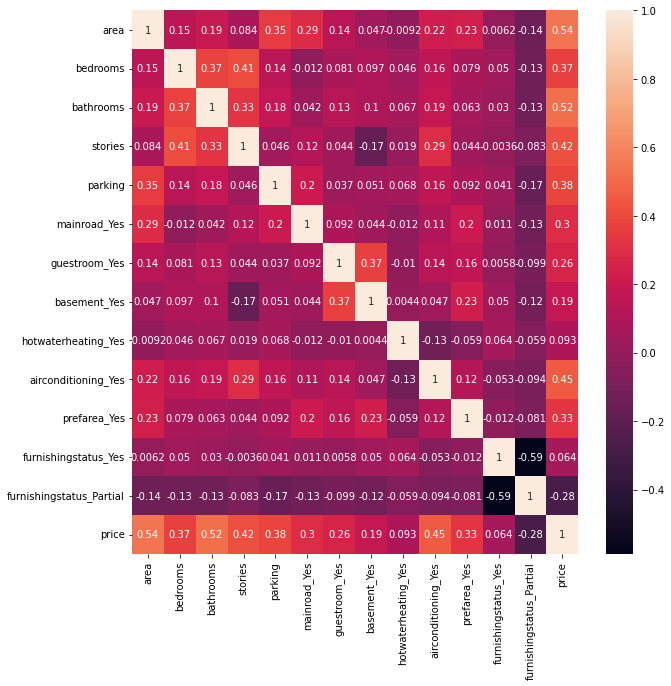

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [22]:
x = dataset.iloc[:,:-1]
x

,area,bedrooms,bathrooms,stories,parking,mainroad_Yes,guestroom_Yes,basement_Yes,hotwaterheating_Yes,airconditioning_Yes,prefarea_Yes,furnishingstatus_Yes,furnishingstatus_Partial
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [23]:
y=dataset['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

**Perform Scaling on Data**

In [28]:
sc = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [29]:
# transform data to csv sheet
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x

,area,bedrooms,bathrooms,stories,parking,mainroad_Yes,guestroom_Yes,basement_Yes,hotwaterheating_Yes,airconditioning_Yes,prefarea_Yes,furnishingstatus_Yes,furnishingstatus_Partial
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,1.183588,-0.696429
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,-0.696429


**Split data into train and test**

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## 26.1 Model by Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Test Model**

In [35]:
lr.score(x_test, y_test)*100

65.29242642153177

**Graphical representation of constant and coefficient**

In [36]:
lr.coef_

array([ 511615.56377666,   56615.57245779,  549420.50124098,
        353158.42985604,  193542.78167455,  128151.92129533,
         88590.21346152,  186194.15050566,  143233.20624958,
        367817.89491558,  267018.66081239,  -62550.29721128,
       -193987.7810882 ])

In [37]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_Yes',
       'guestroom_Yes', 'basement_Yes', 'hotwaterheating_Yes',
       'airconditioning_Yes', 'prefarea_Yes', 'furnishingstatus_Yes',
       'furnishingstatus_Partial'],
      dtype='object')

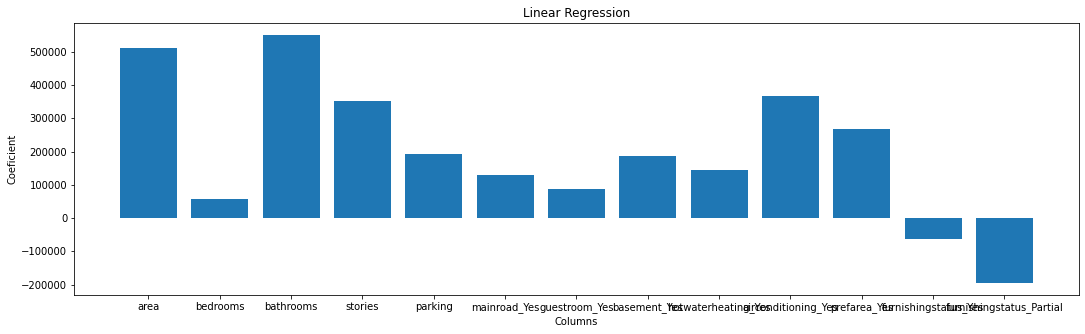

In [43]:
#plt.bar(x_data, y_data)
plt.figure(figsize=(18,5))
plt.title("Linear Regression")
plt.bar(x.columns, lr.coef_)
plt.xlabel("Columns")
plt.ylabel("Coeficient")
plt.show()

## 26.2 Model by Lasso (L1) 

This technique is used for feature selection

In [45]:
# alpha: penalty corner, default 1.0
la = Lasso (alpha=0.5)
la.fit(x_train, y_train)

Lasso(alpha=0.5)

**Test the Model**

In [47]:
la.score(x_test, y_test)*100

65.29241383553659

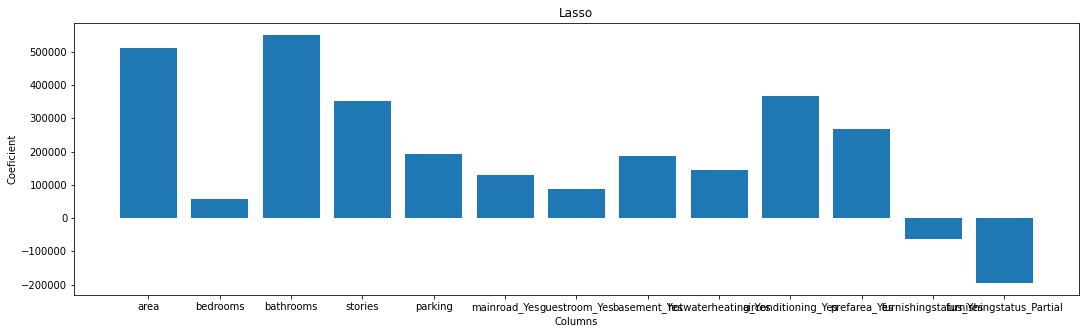

In [50]:
#plt.bar(x_data, y_data)
plt.figure(figsize=(18,5))
plt.title("Lasso")
plt.bar(x.columns, la.coef_)
plt.xlabel("Columns")
plt.ylabel("Coeficient")
plt.show()

## 26.3 Model by Ridge (L2) 

- It reduces coefficient values and save model from over-fitting

In [51]:
ri = Ridge(alpha=10)
ri.fit(x_train, y_train)

Ridge(alpha=10)

**Test the Model**

In [53]:
ri.score(x_test, y_test)*100

65.19079253215374

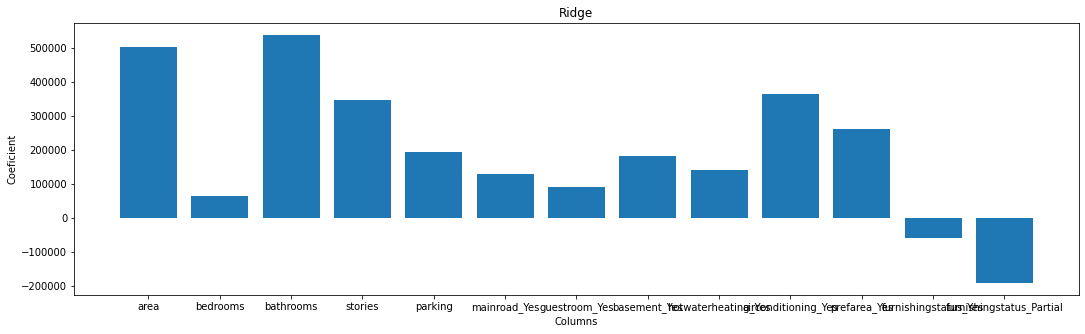

In [54]:
#plt.bar(x_data, y_data)
plt.figure(figsize=(18,5))
plt.title("Ridge")
plt.bar(x.columns, ri.coef_)
plt.xlabel("Columns")
plt.ylabel("Coeficient")
plt.show()

## 26.4 To check which model is best

### 26.4.1 Regression Model

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [61]:
#mean_squared_error(y_true, y_pred)
print(mean_squared_error(y_test, lr.predict(x_test)))
#mean_absolute_error(y_true, y_pred)
print(mean_absolute_error(y_test, lr.predict(x_test)))
# Root mean sqaure error
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

1754318687330.6672
970043.4039201641
1324506.96009144


### 26.4.2 Lasso (L1) Model

In [62]:
#mean_squared_error(y_true, y_pred)
print(mean_squared_error(y_test, la.predict(x_test)))
#mean_absolute_error(y_true, y_pred)
print(mean_absolute_error(y_test, la.predict(x_test)))
# Root mean sqaure error
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

1754319323498.6353
970043.3950649527
1324507.2002441646


### 26.4.3 Ridge (L2) Model

In [63]:
#mean_squared_error(y_true, y_pred)
print(mean_squared_error(y_test, ri.predict(x_test)))
#mean_absolute_error(y_true, y_pred)
print(mean_absolute_error(y_test, ri.predict(x_test)))
# Root mean sqaure error
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

1759455843663.3877
967942.6216085082
1326444.8136516602


**We will use Ridge model as it is showing comparatively less error as compared to Lasso and Linear regression model**

### 26.4.3 To compare coefficient of all models

In [64]:
df = pd.DataFrame({"col_name":x.columns, "LinearRegression":lr.coef_, "Lasso":la.coef_, "Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,area,511615.563777,511615.467912,502252.286215
1,bedrooms,56615.572458,56615.441731,65132.373585
2,bathrooms,549420.501241,549420.321462,537574.041615
3,stories,353158.429856,353158.186082,346006.857732
4,parking,193542.781675,193542.619408,194954.682792
5,mainroad_Yes,128151.921295,128151.745183,130790.775299
6,guestroom_Yes,88590.213462,88590.029990,91998.609421
7,basement_Yes,186194.150506,186193.873949,181385.995261
8,hotwaterheating_Yes,143233.206250,143232.743062,140133.580908
9,airconditioning_Yes,367817.894916,367817.774947,364207.282689
